# joo offline ma linear reg, polynomial aayu to online ma KNN and descision tree hase


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [101]:
df = pd.read_csv("titanic.csv")
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [102]:
df.isna().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [103]:
df = df.drop(df[['cabin','name','ticket']], axis=1)
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,0
1305,3,female,NaN,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


In [104]:
df.isna().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
survived      0
dtype: int64

In [105]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [106]:
df['fare'].fillna(df['fare'].median(), inplace=True)

In [107]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [108]:
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

In [109]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.000000,0,0,211.3375,S,1
1,1,male,0.916700,1,2,151.5500,S,1
2,1,female,2.000000,1,2,151.5500,S,0
3,1,male,30.000000,1,2,151.5500,S,0
4,1,female,25.000000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,14.4542,C,0
1305,3,female,29.881135,1,0,14.4542,C,0
1306,3,male,26.500000,0,0,7.2250,C,0
1307,3,male,27.000000,0,0,7.2250,C,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1309 non-null   float64
 6   embarked  1309 non-null   object 
 7   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [111]:
print(df.head(20))

    pclass     sex        age  sibsp  parch      fare embarked  survived
0        1  female  29.000000      0      0  211.3375        S         1
1        1    male   0.916700      1      2  151.5500        S         1
2        1  female   2.000000      1      2  151.5500        S         0
3        1    male  30.000000      1      2  151.5500        S         0
4        1  female  25.000000      1      2  151.5500        S         0
5        1    male  48.000000      0      0   26.5500        S         1
6        1  female  63.000000      1      0   77.9583        S         1
7        1    male  39.000000      0      0    0.0000        S         0
8        1  female  53.000000      2      0   51.4792        S         1
9        1    male  71.000000      0      0   49.5042        C         0
10       1    male  47.000000      1      0  227.5250        C         0
11       1  female  18.000000      1      0  227.5250        C         1
12       1  female  24.000000      0      0   69.30

{'whiskers': [<matplotlib.lines.Line2D at 0x2936d422ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2936d43b5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2936d422b80>],
 'medians': [<matplotlib.lines.Line2D at 0x2936d43bca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2936d457040>],
 'means': []}

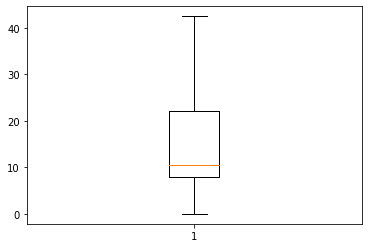

In [119]:
# Remove outliers ,, run this block untill all outliers removed
q1=df.fare.quantile(0.25)
q3=df.fare.quantile(0.75)
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR
df=df[(df.fare>=LL)&(df.fare<=UL)]
plt.boxplot(df.fare)

In [120]:
df = pd.get_dummies(df)

In [121]:
df

,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
5,1,48.000000,0,0,26.5500,1,False,True,False,False,True
7,1,39.000000,0,0,0.0000,0,False,True,False,False,True
14,1,80.000000,0,0,30.0000,1,False,True,False,False,True
15,1,29.881135,0,0,25.9250,0,False,True,False,False,True
22,1,26.000000,0,0,30.0000,1,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,0,True,False,True,False,False
1305,3,29.881135,1,0,14.4542,0,True,False,True,False,False
1306,3,26.500000,0,0,7.2250,0,False,True,True,False,False
1307,3,27.000000,0,0,7.2250,0,False,True,True,False,False


In [137]:
x = df.drop('survived', axis=1)
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=10)
model = DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       143
           1       0.71      0.69      0.70        68

    accuracy                           0.81       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.81      0.81      0.81       211



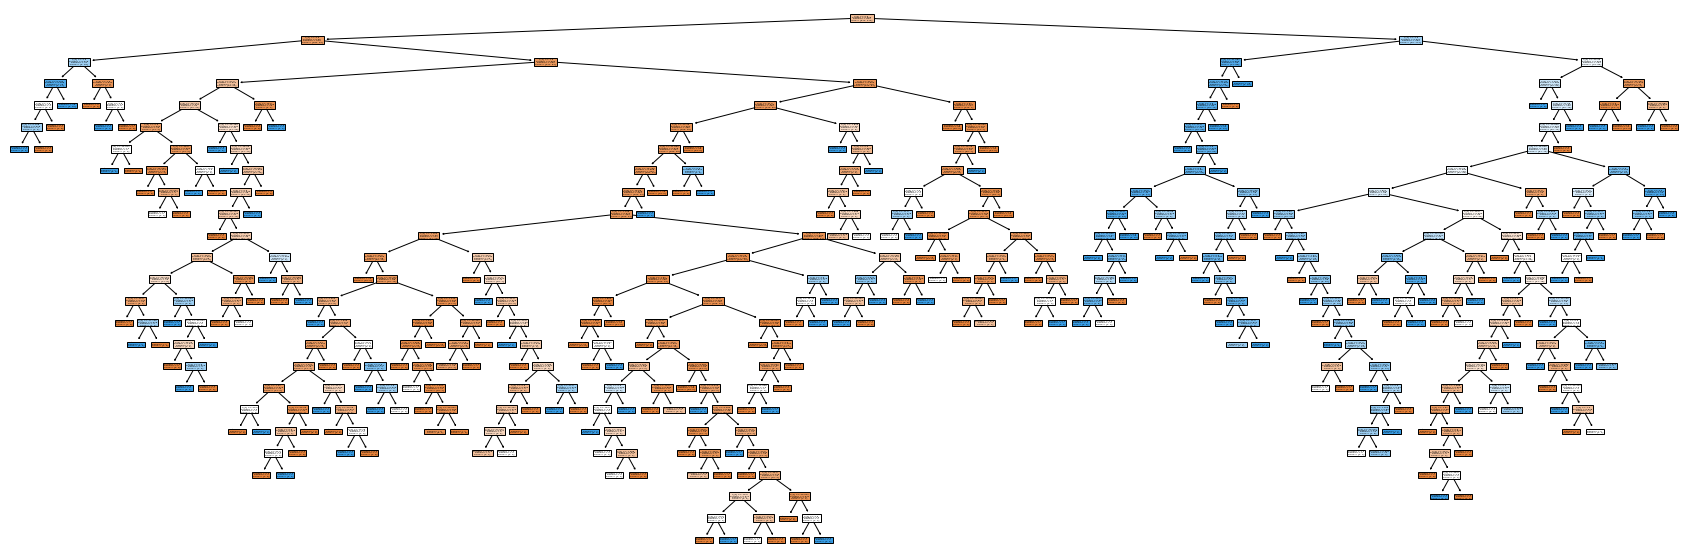

In [138]:
# Out of syllabus (Just for fun)
plt.figure(figsize=(30,10))
plot_tree(model, filled=True)
plt.show()